Download the necessary libraries & import data.

In [28]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD

from sklearn.decomposition import FastICA, NMF, KernelPCA, PCA
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import SpectralEmbedding
import seaborn as sns
import umap

from adjustText import adjust_text
from itertools import combinations

In [29]:
df = pd.read_csv('authors.csv').rename(columns = {'Unnamed: 0': 'Author'})
X = df.copy().drop(['Author','BookID'], axis=1)

### Spectral Embeddings

rows = chapters, columns = words .

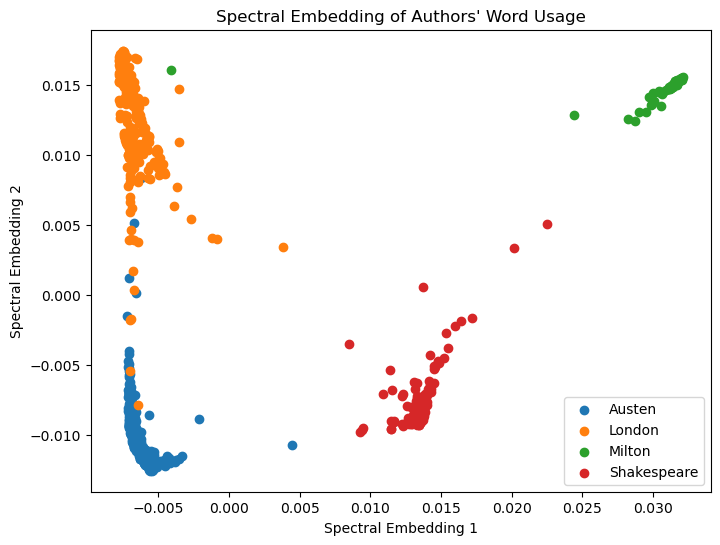

In [30]:
authors = df['Author'].values  # n_samples-length array

# Spectral Embedding
spectral = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
X_spec = spectral.fit_transform(X)  # shape: (n_samples, 2)

# Plotting
plt.figure(figsize=(8, 6))
for author in ['Austen', 'London', 'Milton', 'Shakespeare']:
    mask = (authors == author)
    plt.scatter(X_spec[mask, 0], X_spec[mask, 1], label=author)

plt.xlabel("Spectral Embedding 1")
plt.ylabel("Spectral Embedding 2")
plt.title("Spectral Embedding of Authors' Word Usage")
plt.legend(loc="lower right")
plt.show()


rows = words, columns = chapters .

In [40]:
X_transpose = X.T
X_transpose = X_transpose.rename(columns = {i:f'Chapter{i}' for i in range(df.shape[0])})
X_transpose

,Chapter0,Chapter1,Chapter2,Chapter3,Chapter4,Chapter5,Chapter6,Chapter7,Chapter8,Chapter9,...,Chapter831,Chapter832,Chapter833,Chapter834,Chapter835,Chapter836,Chapter837,Chapter838,Chapter839,Chapter840
a,46,35,46,40,29,27,34,38,34,54,...,46,48,39,22,28,32,16,22,25,26
all,12,10,2,7,5,8,8,6,12,8,...,4,2,5,13,7,4,5,15,4,4
also,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
an,3,7,3,4,6,3,15,2,5,6,...,3,9,10,5,7,6,5,3,8,2
and,66,44,40,64,52,42,44,67,50,44,...,43,45,38,47,45,33,49,48,59,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
who,8,3,4,5,2,6,4,6,1,3,...,1,0,2,4,2,3,0,0,2,3
will,4,5,5,3,4,3,9,7,2,5,...,7,10,8,9,7,11,11,12,22,11
with,9,14,15,22,21,18,11,15,13,15,...,18,11,26,12,8,17,20,15,23,19
would,1,8,3,4,10,4,6,3,12,6,...,2,6,2,6,3,5,2,1,4,0


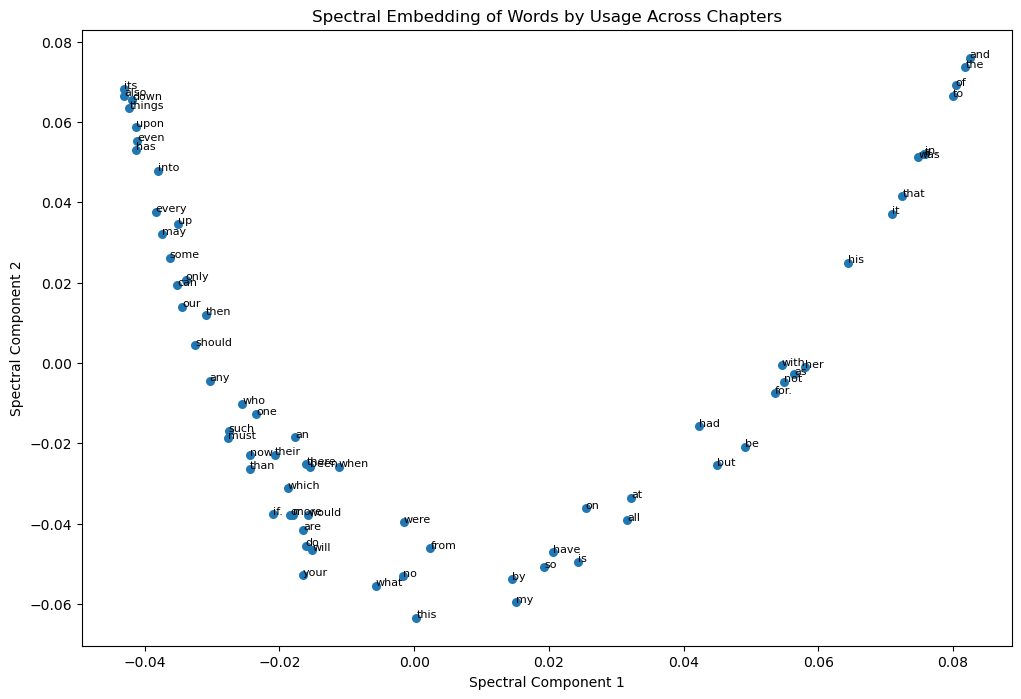

In [42]:
# Convert to NumPy array
X_words = X_transpose.to_numpy()

# Apply Spectral Embedding
spectral = SpectralEmbedding(n_components=2, affinity='nearest_neighbors', n_neighbors=10, random_state=0)
X_words_spec = spectral.fit_transform(X_words)

# Plotting the words
plt.figure(figsize=(12, 8))
plt.scatter(X_words_spec[:, 0], X_words_spec[:, 1], s=30)

# Optional: add word labels
for i, word in enumerate(X_transpose.index):
    plt.text(X_words_spec[i, 0], X_words_spec[i, 1], word, fontsize=8)

plt.title("Spectral Embedding of Words by Usage Across Chapters")
plt.xlabel("Spectral Component 1")
plt.ylabel("Spectral Component 2")
plt.show()
